# Analysis On Air Quality and Astma & Copd

### Import Necessary Packages

In [26]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as ticker

In [27]:
# data loading
air_quality = pd.read_json("data/air_quality/2021_Melbourne_CBD_air_quality.json")
health_data = pd.read_json("data/asthma_copd/asthma_copd_merged.json")
sa2_mapping = pd.read_csv('data/Melbourne_Inner_SA2.csv')

## 1. EDA

In [28]:
# print first 5 rows of data
print(air_quality.head())

air_quality.describe()

# get data type
air_quality.info()


         datetime_AEST       datetime_local  location_id  location_name  \
0  2020-12-31 23:00:00  2021-01-01 00:00:00        10239  Melbourne CBD   
1  2021-01-01 00:00:00  2021-01-01 01:00:00        10239  Melbourne CBD   
2  2021-01-01 01:00:00  2021-01-01 02:00:00        10239  Melbourne CBD   
3  2021-01-01 02:00:00  2021-01-01 03:00:00        10239  Melbourne CBD   
4  2021-01-01 03:00:00  2021-01-01 04:00:00        10239  Melbourne CBD   

   BPM2.5  
0   0.400  
1   5.750  
2  -3.867  
3   5.100  
4   5.350  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8762 entries, 0 to 8761
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime_AEST   8762 non-null   object 
 1   datetime_local  8762 non-null   object 
 2   location_id     8762 non-null   int64  
 3   location_name   8762 non-null   object 
 4   BPM2.5          8409 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 34

In [29]:
print(health_data.head())
health_data.describe()
health_data.info()

   cob_aus_lc_copd_emph  cob_aus_asth  sa2_code_2021
0                     9           328      206041504
1                    75           885      206041506
2                     0             6      206041120
3                    79           801      206041121
4                    22           460      206041505
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   cob_aus_lc_copd_emph  15 non-null     int64
 1   cob_aus_asth          15 non-null     int64
 2   sa2_code_2021         15 non-null     int64
dtypes: int64(3)
memory usage: 492.0 bytes


In [30]:
print(sa2_mapping.head())

   SA2_CODE_2021      SA2_NAME_2021
0      206011106     Brunswick East
1      206011107     Brunswick West
2      206011109  Pascoe Vale South
3      206011495  Brunswick - North
4      206011496  Brunswick - South


In [31]:
# check null value
air_quality.isnull().sum()

datetime_AEST       0
datetime_local      0
location_id         0
location_name       0
BPM2.5            353
dtype: int64

In [32]:
health_data.isnull().sum()

cob_aus_lc_copd_emph    0
cob_aus_asth            0
sa2_code_2021           0
dtype: int64

In [33]:
sa2_mapping.isnull().sum()

SA2_CODE_2021    0
SA2_NAME_2021    0
dtype: int64

## 2. Visualisation

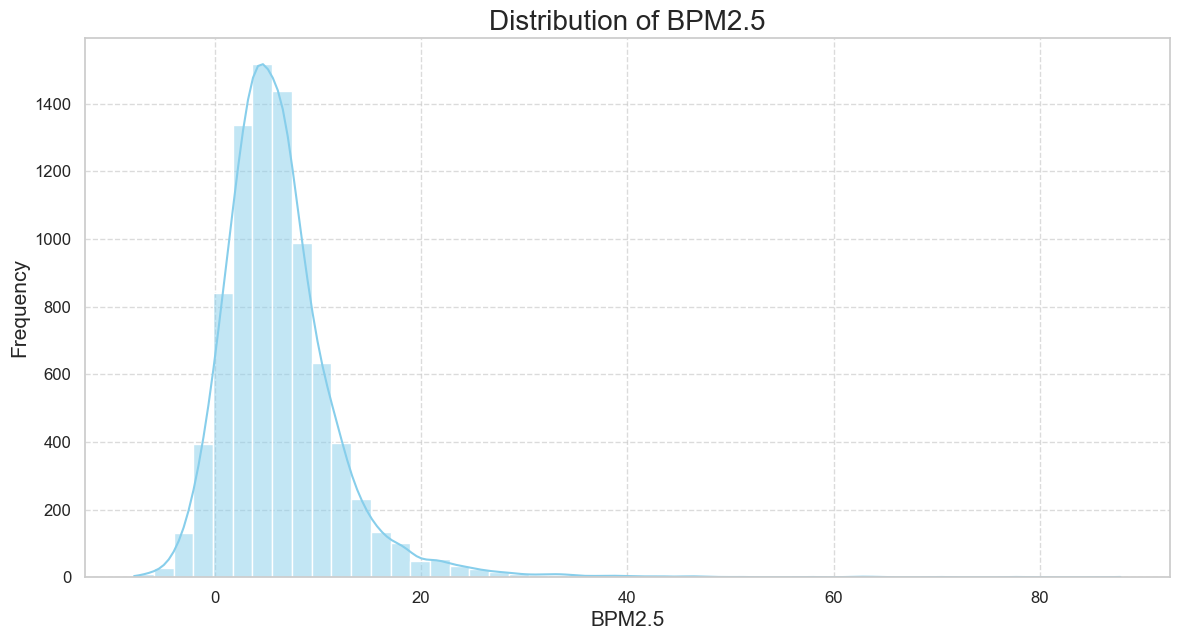

In [34]:
sns.set_theme(style="whitegrid")

# draw plot to show the distribution of BPM2.5
plt.figure(figsize=(14, 7))
sns.histplot(air_quality['BPM2.5'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of BPM2.5', fontsize=20)
plt.xlabel('BPM2.5', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [35]:
# Convert 'datetime_local' column to datetime and set it as index
air_quality['datetime_local'] = pd.to_datetime(air_quality['datetime_local'])
air_quality.set_index('datetime_local', inplace=True)

# Calculate daily average PM2.5 levels
daily_pm25 = air_quality['BPM2.5'].resample('D').mean()

# Check for missing data and interpolate if necessary
missing_data_count = daily_pm25.isnull().sum()
print(f"Total missing days in PM2.5 data: {missing_data_count}")

# Interpolating missing data using linear interpolation
daily_pm25_interpolated = daily_pm25.interpolate()

mean_pm25 = daily_pm25_interpolated.mean()

Total missing days in PM2.5 data: 9


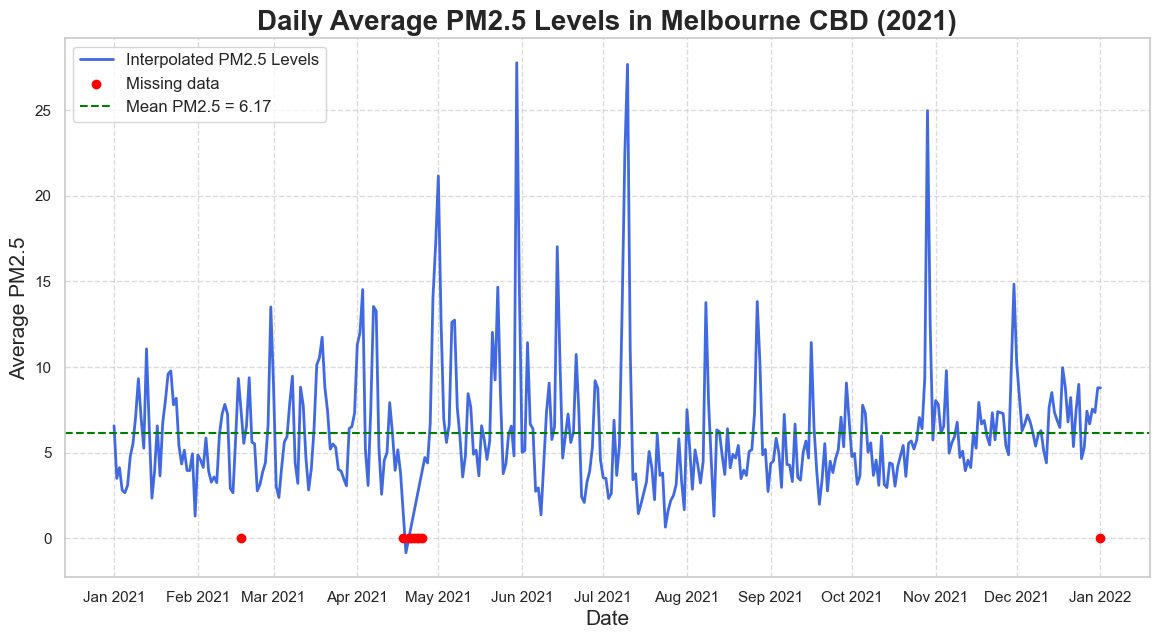

In [36]:
# draw plot to show Daily Average PM2.5 Levels in Melbourne CBD (2021)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

# draw Interpolated PM2.5 Levels
plt.plot(daily_pm25_interpolated.index, daily_pm25_interpolated, label='Interpolated PM2.5 Levels', color='royalblue', linewidth=2)

# mark missing values
missing_data_points = daily_pm25[daily_pm25.isnull()]
plt.scatter(missing_data_points.index, [0]*len(missing_data_points), color='red', label='Missing data', zorder=5)

# add line to show mean value
plt.axhline(y=mean_pm25, color='green', linestyle='--', linewidth=1.5, label=f'Mean PM2.5 = {mean_pm25:.2f}')

# add title and labels
plt.title('Daily Average PM2.5 Levels in Melbourne CBD (2021)', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average PM2.5', fontsize=15)

# change date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# add legend
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


0    POLYGON ((149.58424 -35.44426, 149.58444 -35.4...
1    POLYGON ((149.21899 -35.36738, 149.21800 -35.3...
2    POLYGON ((149.21326 -35.34325, 149.21619 -35.3...
3    POLYGON ((149.24034 -35.34781, 149.24024 -35.3...
4    POLYGON ((149.19572 -35.36126, 149.19970 -35.3...
Name: geometry, dtype: geometry


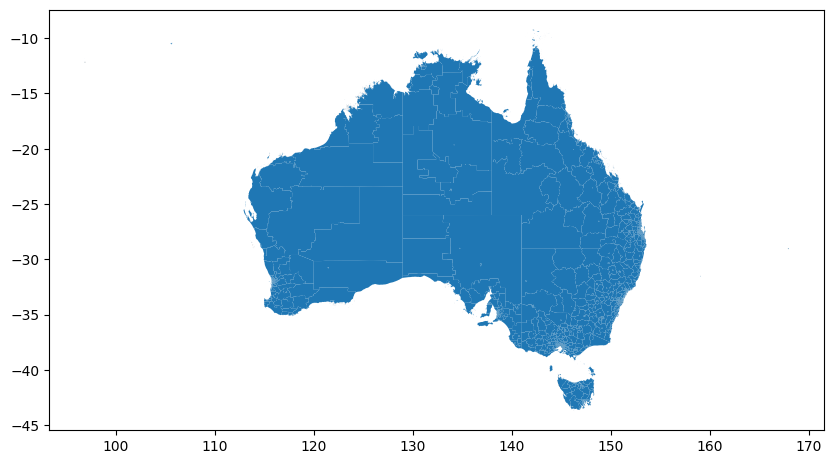

In [3]:
# Load the geographical data for Melbourne Inner SA2
gdf = gpd.read_file('data/SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp').to_crs(epsg=4326)

# Check the geometry
print(gdf.geometry.head())

# Attempt a simple plot of the geographical data to check for any issues
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax)
plt.show()

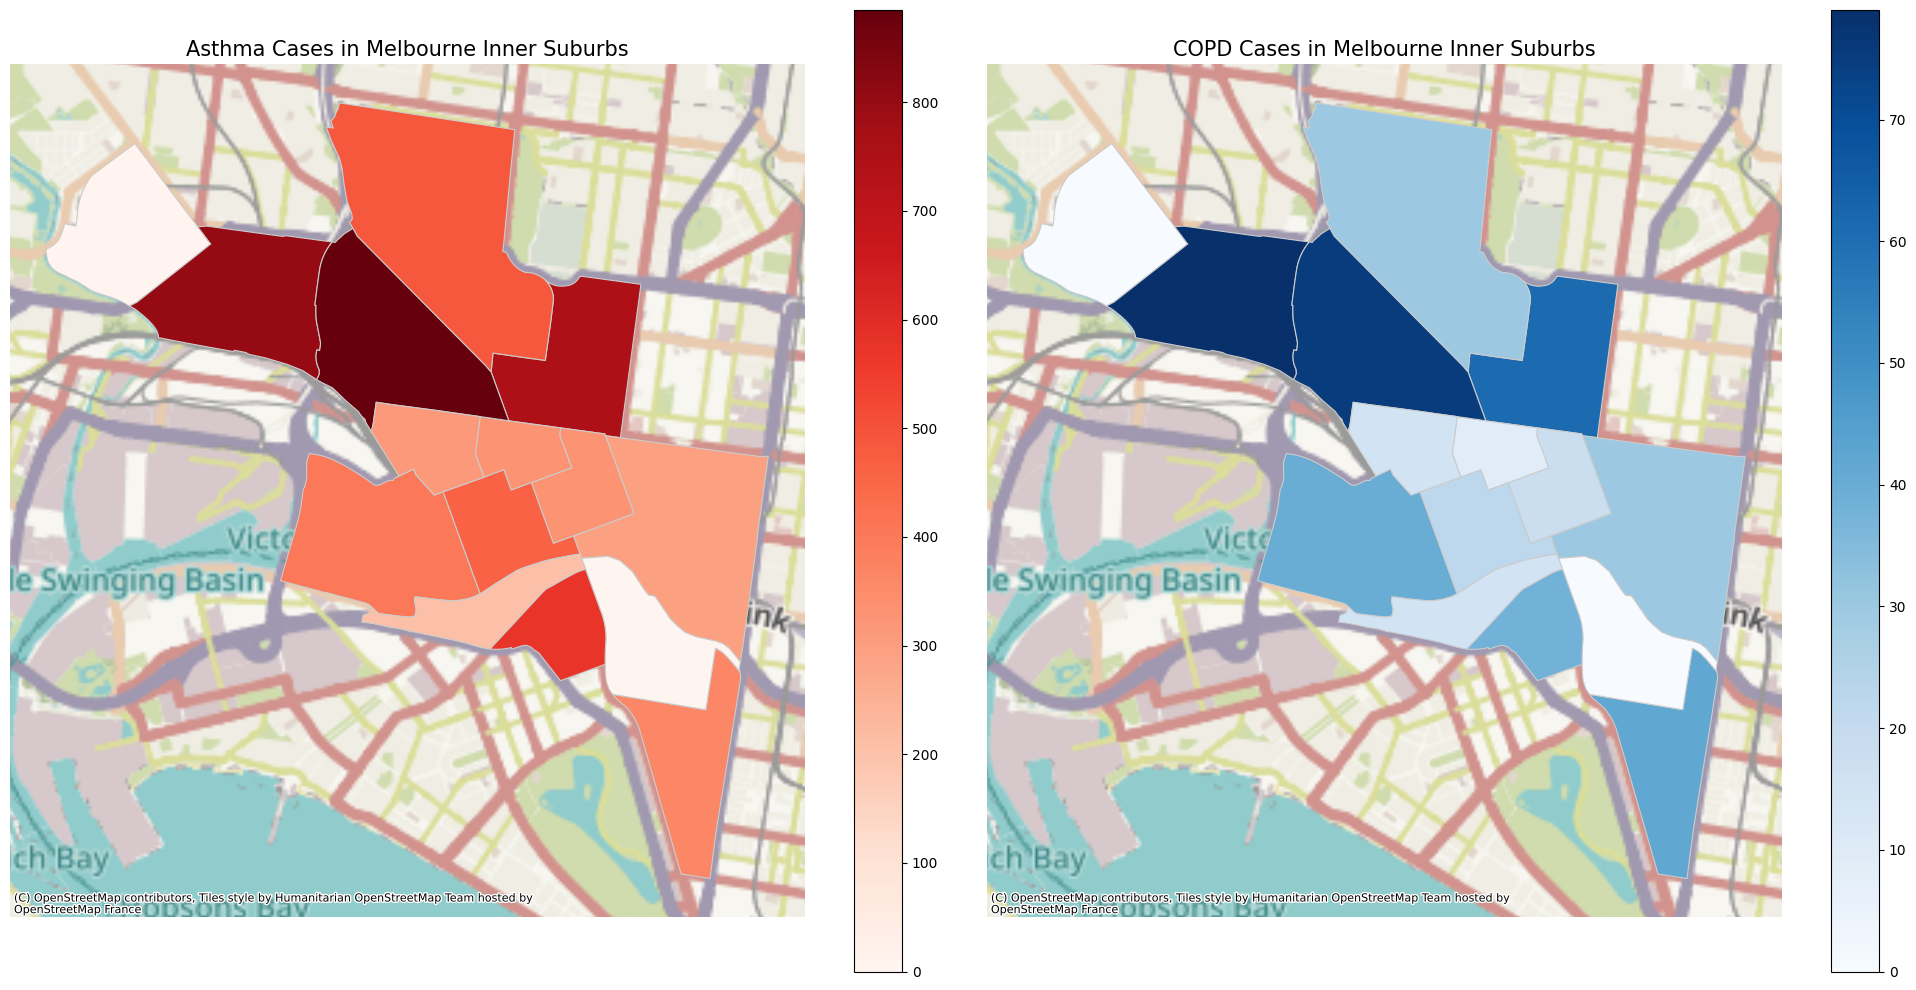

In [4]:
# Convert codes to string to ensure data type consistency
gdf['SA2_CODE21'] = gdf['SA2_CODE21'].astype(str)
health_data['sa2_code_2021'] = health_data['sa2_code_2021'].astype(str)
sa2_mapping['SA2_CODE_2021'] = sa2_mapping['SA2_CODE_2021'].astype(str)

# Filter for Melbourne's inner suburbs
gdf_inner = gdf[gdf['SA2_NAME21'].isin(sa2_mapping['SA2_NAME_2021'])]

# Merge health data with geographic data
merged_data = gdf_inner.merge(health_data, how='left', left_on='SA2_CODE21', right_on='sa2_code_2021')

# Convert coordinates system to Web Mercator for mapping
merged_data = merged_data.to_crs(epsg=3857)

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# Map for asthma cases using a red color map
merged_data.plot(column='cob_aus_asth', cmap='Reds', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title('Asthma Cases in Melbourne Inner Suburbs', fontsize=15)
ax1.set_axis_off()
ctx.add_basemap(ax1, zoom=12)  # Add a basemap for context

# Map for COPD cases using a blue color map
merged_data.plot(column='cob_aus_lc_copd_emph', cmap='Blues', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('COPD Cases in Melbourne Inner Suburbs', fontsize=15)
ax2.set_axis_off()
ctx.add_basemap(ax2, zoom=12)  # Add a basemap for context

plt.tight_layout()  # Adjust subplots layout to ensure consistent spacing
plt.show()